In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from scipy import stats



In [6]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Load data
df = pd.read_csv('/home/daksh/Downloads/pumpfun_09-08-2025_to_09-11-2025.csv/pumpfun_09-08-2025_to_09-11-2025.csv')


In [7]:
df.head()

,Date,Block ID,Token Address,Token Price,Token Amount,Transaction Type,Transaction ID,Wallet Address,Platform,SOL in Curve,Outstanding Shares
0,2025-09-10T21:53:07Z,365979506,8n2XWSL8mHX3mog9hSSPWeF4fX6bvYNKHEtdpiGxpump,2.842498e-08,1.759017e+07,Buy,25aKECD7BKGJ7bctQwpjnKZqcHaz83FbtsnH1d2xu8c5Er...,7mjGLWmXxZT6ddQJqpJ2u7YhoJ3kdYEQCDY1EeuxMQGv,6EF8rrecthR5Dkzon8Nwu78hRvfCKubJ14M5uBEwF6P,0.500003,1.759026e+07
1,2025-09-10T21:53:07Z,365979506,8n2XWSL8mHX3mog9hSSPWeF4fX6bvYNKHEtdpiGxpump,3.435632e-08,1.676548e+08,Buy,5Qk5ULqVVrfEsR5ysE4bcTNcthfJGB7KwxvezACSeWr2Vu...,9oTWV5qnPNRaAPDmTiP8Gvebe4GcrjCHYKcUDm9YaNec,6EF8rrecthR5Dkzon8Nwu78hRvfCKubJ14M5uBEwF6P,6.260004,1.852450e+08
2,2025-09-10T21:53:07Z,365979506,8n2XWSL8mHX3mog9hSSPWeF4fX6bvYNKHEtdpiGxpump,4.687104e-08,1.141430e+08,Buy,3No8SgAzLgMq1gEJ5eRiiBZrCtH6qmWdKXPC9XjChdpmzT...,GPwTd9Muouep2k7NRjuREsTNuCFdbRVGbnrmQL8zEc86,6EF8rrecthR5Dkzon8Nwu78hRvfCKubJ14M5uBEwF6P,11.610006,2.993881e+08
3,2025-09-10T21:53:07Z,365979506,8n2XWSL8mHX3mog9hSSPWeF4fX6bvYNKHEtdpiGxpump,6.008180e-08,8.105619e+07,Buy,E11rFWqAkGZaLD8V2bSJNd9Yke8ZarEgve8gG5HVbbiwVj...,8HcYptCBAaPFWkmupiSAmysZ6Z8jB7N1c4YhVjhX7zbg,6EF8rrecthR5Dkzon8Nwu78hRvfCKubJ14M5uBEwF6P,16.480008,3.804443e+08
4,2025-09-10T21:53:07Z,365979506,8n2XWSL8mHX3mog9hSSPWeF4fX6bvYNKHEtdpiGxpump,7.327930e-08,5.827023e+07,Buy,rDyRJByv9o74umMkb8KSmrjioKQM8aoEqWNEMPTDinChZ3...,ELGNVYE7X1R1uQSuVqFN8TxbV7AipcQ23HmmqNhCVUMy,6EF8rrecthR5Dkzon8Nwu78hRvfCKubJ14M5uBEwF6P,20.750011,4.387145e+08


In [8]:
df['Token Address'].value_counts()

Token Address
AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji    387044
CsKfV8ePhQWiyQxNJwXhKZHcmUyNWBkHFGrkZGdJpump    239046
HFu8iR5Nro4Xeu4q8cxxR6ivBWSBd486w3fXdAuJpump    209567
CEqFiJoB6HLncfeieBw3PKKm9wyqrpSHV3VH4qZApump    186977
3FeFKTFQk2pEWwqax7vjxz6jSbFUpPASnACRSzDQcSRQ    169949
                                                 ...  
2Vw5e9p7FycpMNed1vbQWXiU36ecwTmuZBXjfqdYpump       188
GcxfArvmBoyr3p5uX9RuB8KBMc4GAFbkPF7yH2bupump       186
DyQmhPnJk3gzeo4DHL1SUyJvcuavaP4DYMNoTBnepump       137
AAZfc1gqPQQ3ixsTPsVZRbfsZ4r8e4gswB3jGHyrpump       119
AvPE36jiP2RD61m57PTnYwXhiTVw1xAUN8jHevG1pump        70
Name: count, Length: 675, dtype: int64

In [9]:
df = df[df['Token Address']=='AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji']

In [10]:
# Jump Detection Configuration
JUMP_PERCENTAGE = 20.0  # Percentage threshold for jump detection (e.g., 20% = 20% increase)
WINDOW_SIZE = 20  # Window size for calculating rolling statistics

def detect_jumps(df, price_col='Token Price', jump_percentage=JUMP_PERCENTAGE, window_size=WINDOW_SIZE):
    """
    Detect significant price jumps over a rolling window.
    
    Parameters:
    - df: DataFrame with price data
    - price_col: Column name containing price data
    - jump_percentage: Minimum percentage change to consider as a jump
    - window_size: Rolling window size for calculating baseline
    
    Returns:
    - DataFrame with jump detection results
    """
    df = df.copy()
    
    # Calculate rolling statistics
    df['rolling_mean'] = df[price_col].rolling(window=window_size, min_periods=1).mean()
    df['rolling_std'] = df[price_col].rolling(window=window_size, min_periods=1).std()
    
    # Calculate percentage change from rolling mean
    df['pct_change_from_mean'] = ((df[price_col] - df['rolling_mean']) / df['rolling_mean']) * 100
    
    # Detect jumps (both positive and negative)
    df['is_jump_up'] = df['pct_change_from_mean'] >= jump_percentage
    df['is_jump_down'] = df['pct_change_from_mean'] <= -jump_percentage
    df['is_jump'] = df['is_jump_up'] | df['is_jump_down']
    
    # Calculate jump magnitude
    df['jump_magnitude'] = np.where(df['is_jump'], abs(df['pct_change_from_mean']), 0)
    
    return df

# Apply jump detection
df_with_jumps = detect_jumps(df, jump_percentage=JUMP_PERCENTAGE, window_size=WINDOW_SIZE)

print(f"Jump Detection Results:")
print(f"Window Size: {WINDOW_SIZE}")
print(f"Jump Threshold: {JUMP_PERCENTAGE}%")
print(f"Total jumps detected: {df_with_jumps['is_jump'].sum()}")
print(f"Upward jumps: {df_with_jumps['is_jump_up'].sum()}")
print(f"Downward jumps: {df_with_jumps['is_jump_down'].sum()}")
print(f"Average jump magnitude: {df_with_jumps[df_with_jumps['is_jump']]['jump_magnitude'].mean():.2f}%")


Jump Detection Results:
Window Size: 20
Jump Threshold: 20.0%
Total jumps detected: 54
Upward jumps: 32
Downward jumps: 22
Average jump magnitude: 29.93%


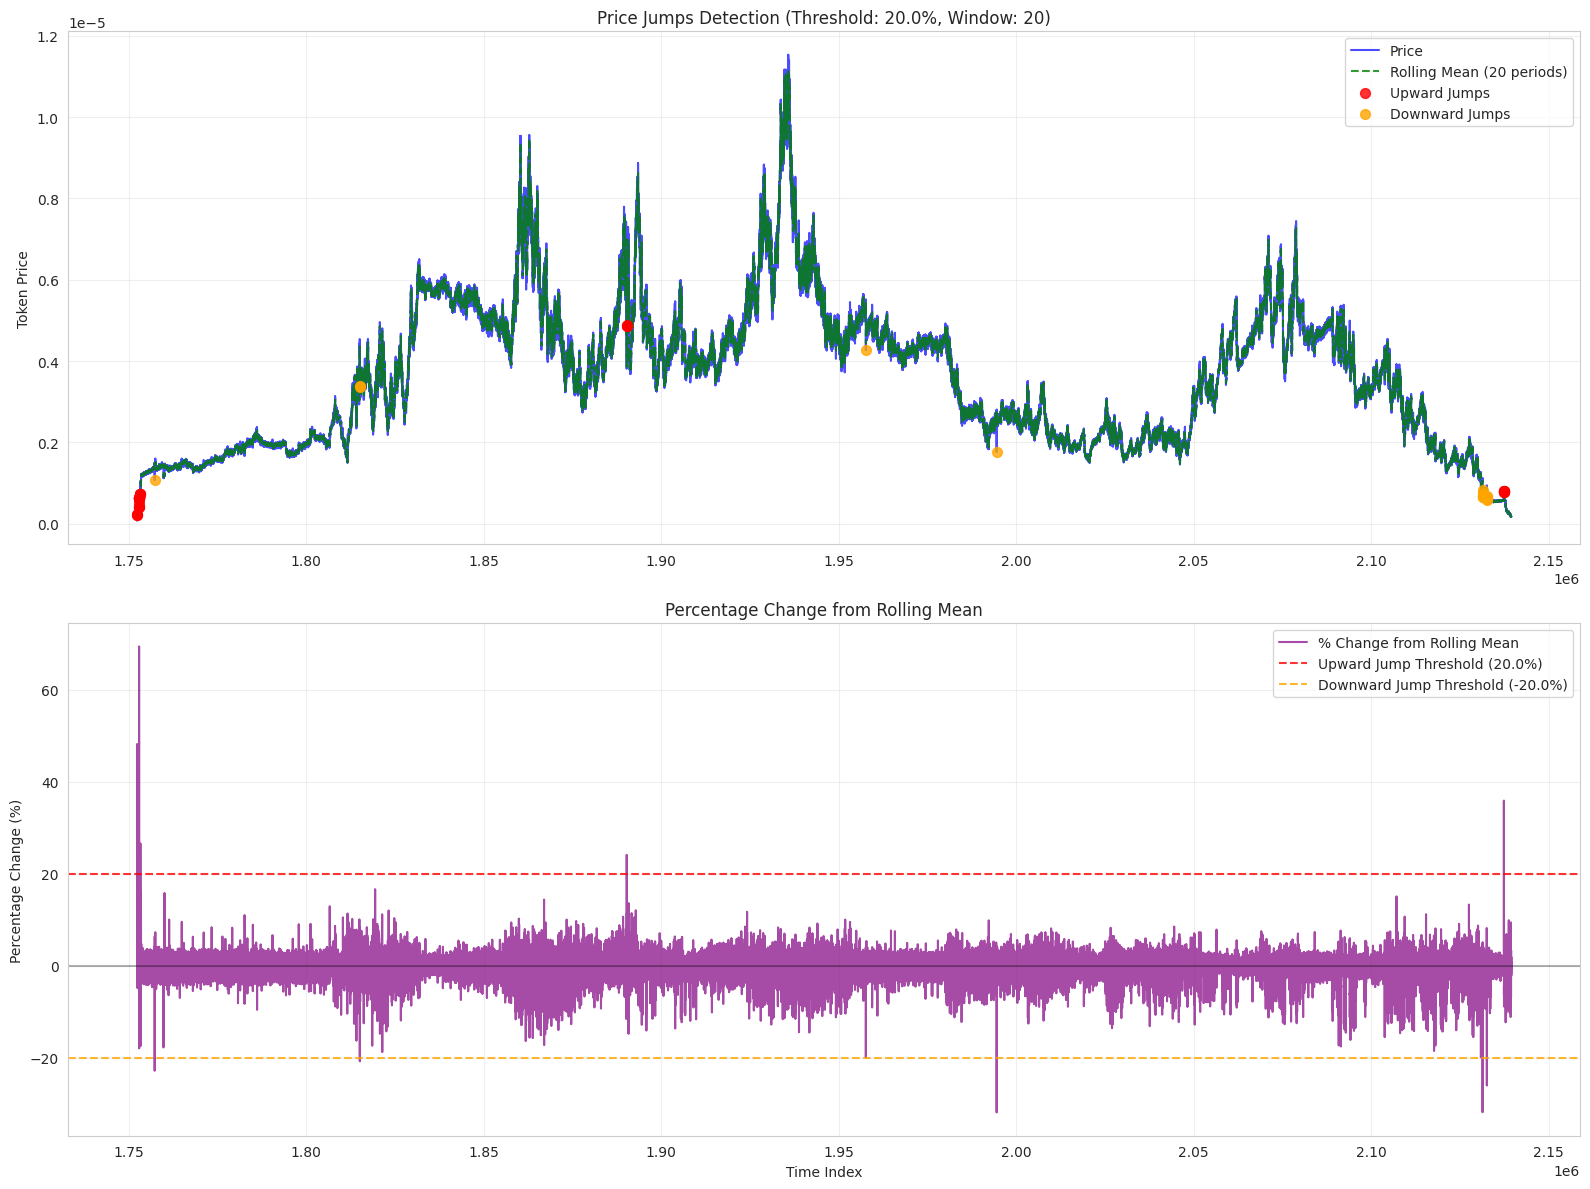


Detailed Jump Statistics:
Total jumps: 54
Upward jumps: 32
Downward jumps: 22
Max upward jump: 69.41%
Max downward jump: 31.94%
Average jump magnitude: 29.93%


In [11]:
# Visualize detected jumps
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Price with jumps highlighted
ax1.plot(df_with_jumps.index, df_with_jumps['Token Price'], 'b-', alpha=0.7, label='Price')
ax1.plot(df_with_jumps.index, df_with_jumps['rolling_mean'], 'g--', alpha=0.8, label=f'Rolling Mean ({WINDOW_SIZE} periods)')

# Highlight upward jumps
upward_jumps = df_with_jumps[df_with_jumps['is_jump_up']]
ax1.scatter(upward_jumps.index, upward_jumps['Token Price'], color='red', s=50, alpha=0.8, label='Upward Jumps', zorder=5)

# Highlight downward jumps
downward_jumps = df_with_jumps[df_with_jumps['is_jump_down']]
ax1.scatter(downward_jumps.index, downward_jumps['Token Price'], color='orange', s=50, alpha=0.8, label='Downward Jumps', zorder=5)

ax1.set_title(f'Price Jumps Detection (Threshold: {JUMP_PERCENTAGE}%, Window: {WINDOW_SIZE})')
ax1.set_ylabel('Token Price')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Percentage change from rolling mean
ax2.plot(df_with_jumps.index, df_with_jumps['pct_change_from_mean'], 'purple', alpha=0.7, label='% Change from Rolling Mean')
ax2.axhline(y=JUMP_PERCENTAGE, color='red', linestyle='--', alpha=0.8, label=f'Upward Jump Threshold ({JUMP_PERCENTAGE}%)')
ax2.axhline(y=-JUMP_PERCENTAGE, color='orange', linestyle='--', alpha=0.8, label=f'Downward Jump Threshold (-{JUMP_PERCENTAGE}%)')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)

ax2.set_title('Percentage Change from Rolling Mean')
ax2.set_xlabel('Time Index')
ax2.set_ylabel('Percentage Change (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display jump statistics
print("\nDetailed Jump Statistics:")
print("=" * 50)
jump_data = df_with_jumps[df_with_jumps['is_jump']].copy()
if len(jump_data) > 0:
    print(f"Total jumps: {len(jump_data)}")
    print(f"Upward jumps: {len(jump_data[jump_data['is_jump_up']])}")
    print(f"Downward jumps: {len(jump_data[jump_data['is_jump_down']])}")
    print(f"Max upward jump: {jump_data[jump_data['is_jump_up']]['jump_magnitude'].max():.2f}%")
    print(f"Max downward jump: {jump_data[jump_data['is_jump_down']]['jump_magnitude'].max():.2f}%")
    print(f"Average jump magnitude: {jump_data['jump_magnitude'].mean():.2f}%")
else:
    print("No jumps detected with current parameters.")


In [12]:
# Check available columns and data structure
print("Dataset columns:")
print(df.columns.tolist())
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

# Check for trade-related columns
trade_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ['trade', 'buy', 'sell', 'volume', 'amount', 'size'])]
print(f"\nTrade-related columns: {trade_columns}")

# Check data types
print(f"\nData types:")
print(df.dtypes)


Dataset columns:
['Date', 'Block ID', 'Token Address', 'Token Price', 'Token Amount', 'Transaction Type', 'Transaction ID', 'Wallet Address', 'Platform', 'SOL in Curve', 'Outstanding Shares']

Dataset shape: (387044, 11)

First few rows:
                         Date   Block ID  \
1752389  2025-09-10T07:29:06Z  365850325   
1752390  2025-09-10T07:29:06Z  365850326   
1752391  2025-09-10T07:29:06Z  365850326   
1752392  2025-09-10T07:29:06Z  365850326   
1752393  2025-09-10T07:29:06Z  365850326   

                                        Token Address   Token Price  \
1752389  AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji  7.950479e-08   
1752390  AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji  2.273900e-07   
1752391  AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji  2.287456e-07   
1752392  AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji  2.315494e-07   
1752393  AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji  2.349599e-07   

         Token Amount Transaction Type  \
1752389  6.956643e+08       

In [ ]:
df.head()

,Date,Block ID,Token Address,Token Price,Token Amount,Transaction Type,Transaction ID,Wallet Address,Platform,SOL in Curve,Outstanding Shares
1752389,2025-09-10T07:29:06Z,365850325,AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji,7.950479e-08,6.956643e+08,Buy,3PjXTA2oS3kLx5zxo9SkqebpkiWNfuTAAt5dVKuMrkbA2V...,7FFfKyWEHyABd9wRXo9zHtccWSZrKPVHzWkZUbpvh6u,6EF8rrecthR5Dkzon8Nwu78hRvfCKubJ14M5uBEwF6P,55.308646,6.956644e+08
1752390,2025-09-10T07:29:06Z,365850326,AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji,2.273900e-07,2.171381e+06,Buy,26GatY2GUutc2bFQVGx2ofkSCtDyKiF7WsEFAnazM7bAs5...,GaY14Mcp4hKrYQyuoEwzv7VPsFLojyj97mqXDaFmAhbv,6EF8rrecthR5Dkzon8Nwu78hRvfCKubJ14M5uBEwF6P,55.802400,6.978358e+08
1752391,2025-09-10T07:29:06Z,365850326,AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji,2.287456e-07,6.475534e+04,Buy,3YpcdXoMdrfcf7KdLBCpQs1htNvLoN4WzCj71GiuSWVfMY...,7zVmz92yw1iZ2YtmpnLMXQcYjrVogpoSmgKDxEG66QtF,6EF8rrecthR5Dkzon8Nwu78hRvfCKubJ14M5uBEwF6P,55.817212,6.979005e+08
1752392,2025-09-10T07:29:06Z,365850326,AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji,2.315494e-07,4.477994e+06,Buy,246tz2egsf2bVnACe4X1J7U7cDYguFZR7tRypA8mFjobaa...,85XzzdkovN125aVtpXCShEYzwDXMsU2sr5Vf1iaVAPVN,6EF8rrecthR5Dkzon8Nwu78hRvfCKubJ14M5uBEwF6P,56.854089,7.023785e+08
1752393,2025-09-10T07:29:06Z,365850326,AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji,2.349599e-07,9.666544e+05,Buy,5EA2ZuxC4p57U66QhXfvmPxRhnU8jfskZBWnx8gii9NoeX...,Cny7kM3639eXwz7caJZo7QFcaJLTCDrbmH83ySAQu1YR,6EF8rrecthR5Dkzon8Nwu78hRvfCKubJ14M5uBEwF6P,57.081214,7.033452e+08
